In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *

In [3]:
path = Path('.')
path.ls()

[PosixPath('.git'),
 PosixPath('.gitignore'),
 PosixPath('README.md'),
 PosixPath('baseline.py'),
 PosixPath('OffensEval'),
 PosixPath('distilbert-ml.py'),
 PosixPath('data.py'),
 PosixPath('__pycache__'),
 PosixPath('dbert-test.py'),
 PosixPath('keras_attention.py'),
 PosixPath('bi-gru.py'),
 PosixPath('hybrid_model.py'),
 PosixPath('cnn.py'),
 PosixPath('berturk.py'),
 PosixPath('req.txt'),
 PosixPath('berturk-test.py'),
 PosixPath('models.py'),
 PosixPath('bert-embeddings.py'),
 PosixPath('bert-cnn.py'),
 PosixPath('bert-lstm.py'),
 PosixPath('bert-attn.py'),
 PosixPath('vec'),
 PosixPath('fine_tune_LM-Copy1.ipynb'),
 PosixPath('.ipynb_checkpoints')]

## prepare data for MADAMIRA

In [4]:
import string

#preparing punctuations list
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ«»'''
english_punctuations = string.punctuation
punc_to_remove = ''.join(set(arabic_punctuations + english_punctuations))
punc_to_keep = '+'
punc_to_escape = '''[]-^'''
for p in punc_to_keep: punc_to_remove = punc_to_remove.replace(p, '')
for p in punc_to_escape: punc_to_remove = punc_to_remove.replace(p, '\\{}'.format(p))
print(punc_to_remove)

def pre_process(text):
    text = text.replace('\\n', ' ').replace('\n', ' ')
    text = text.replace('؛', '،')
    text = re.sub(r'\([^)]+\)', '', text)  # remove parentheses and everything in between
    text = re.sub(r'[a-zA-Z]', '', text)  # remove non-arabic characters
    text = re.sub(r'\d+(\.\d+)?', ' رقم ', text)  # replace numbers by special token
    for p in punc_to_remove: text = text.replace(p, '')  # remove punctuations
    text = re.sub(r'(.)\1{2,}', r'\1', text)  # remove repeated chars
    text = re.sub(r'\s+', r' ', text)
    return text

×\[”/%؟.«=(\-<÷:،_»@\“…">)`؛~'}&\]?|#!{¦ـ;,–*$\^


__AJGT__

In [5]:
df = pd.read_excel(path/'data'/'AJGT.xlsx')
df.head()

,ID,Feed,Sentiment
0,1,اربد فيها جامعات اكثر من عمان ... وفيها قد عم...,Positive
1,2,الحلو انكم بتحكوا على اساس انو الاردن ما فيه ...,Negative
2,3,كله رائع بجد ربنا يكرمك,Positive
3,4,لسانك قذر يا قمامه,Negative
4,5,​انا داشره وغير متزوجه ولدي علاقات مشبوه واحشش...,Negative


In [6]:
df.Feed.to_csv('./data/AJGT_text_only.txt', header=False, index=False)

MADAMIRA:
`
C:\Users\oae15\Downloads\JDK64\bin\java.exe -Xmx3000m -Xms3000m -XX:NewRatio=3 -jar MADAMIRA-release-20170403-2.1.jar -rawinput "C:\Python\Python36\coding4fun\Notebooks\fastai\for research\Ar_LM\data\AJGT_text_only.txt" -rawoutdir .\samples\output -rawconfig .\samples\sampleConfigFile.xml -msaonly
`

In [7]:
df_mada = pd.read_csv(path/'data'/'AJGT_text_only_processed.txt', sep='\t', header=None, names=['processed_text'])
df_mada.head()

FileNotFoundError: [Errno 2] File b'data/AJGT_text_only_processed.txt' does not exist: b'data/AJGT_text_only_processed.txt'

In [8]:
df.drop(columns=['ID'], inplace=True)
df.Feed = df_mada.processed_text
df.to_csv(path/'data'/'AJGT_final.csv', index=False)

NameError: name 'df_mada' is not defined

__ArTwitter__

In [9]:
df = pd.read_csv(path/'data'/'artwitter.csv')
df.head()

,sentiment,txt
0,1,انشاء الله هنعمل حاجه
1,0,اقسم باللله ان العرب اكثر الشعوب تخلفاا
2,0,﻿هات ناس تفهم .. و المثل بحكي اسأل مجرب و لا ت...
3,0,صرماتي براس اهلك
4,0,حرام السخرية من الناس


In [10]:
df.sentiment.value_counts() # balanced

1    1771
0    1771
Name: sentiment, dtype: int64

In [11]:
df.txt.to_csv(path/'data'/'artwitter_text_only.txt', header=False, index=False)

MADAMIRA...

In [12]:
df_mada = pd.read_csv(path/'data'/'artwitter_text_only_processed.txt', sep='\t', header=None, names=['processed_text'])
df_mada.head()

FileNotFoundError: [Errno 2] File b'data/artwitter_text_only_processed.txt' does not exist: b'data/artwitter_text_only_processed.txt'

In [44]:
df.txt = df_mada.processed_text
df.to_csv(path/'data'/'ArTwitter_final.csv', index=False)

In [47]:
df.head()

,sentiment,txt
0,1,انشاء الله هنعمل حاج +ه
1,0,اقسم بال +ه ان ال+ عرب اكثر ال+ شعوب تخلفا
2,0,هات ناس تفهم . . و ال+ مثل ب+ حك +ي اس...
3,0,صرماتي ب+ راس اهل +ك
4,0,حرام ال+ سخريه من ال+ ناس


__ASTD__

In [20]:
df = pd.read_csv(path/'data'/'ASTD.csv')
df.head()

,category,text
0,OBJ,بعد استقالة رئيس #المحكمة_الدستورية ننتظر استق...
1,POS,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...
2,NEG,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...
3,OBJ,#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية ...
4,NEUTRAL,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...


In [21]:
df.category.value_counts() # unbalanced

OBJ        6691
NEG        1684
NEUTRAL     832
POS         799
Name: category, dtype: int64

In [22]:
df.category = df.category.replace({'NEUTRAL':0, 'POS':1, 'NEG':-1, 'OBJ':-2})
df.text = df.text.apply(lambda x: pre_process(x.replace('_',' ')))
df.head()

,category,text
0,-2,بعد استقالة رئيس المحكمة الدستورية ننتظر استقا...
1,1,أهنئ الدكتور أحمد جمال الدين القيادي بحزب مصر ...
2,-1,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...
3,-2,الحرية والعدالة شاهد الآن ليلة الاتحادية أول ف...
4,0,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...


In [23]:
df.text.to_csv(path/'data'/'ASTD_text_only.txt', header=False, index=False)

MADAMIRA...

In [24]:
df_mada = pd.read_csv(path/'data'/'ASTD_text_only_processed.txt', sep='\t', header=None, names=['processed_text'])
df_mada.head()

,processed_text
0,بعد استقاله رءيس ال+ محكمه ال+ دستوريه ن...
1,اهنء ال+ دكتور احمد جمال ال+ دين ال+ قيا...
2,ال+ برادعي يستقوي ب+ امريكا مره اخري و ...
3,ال+ حريه و+ ال+ عداله شاهد ال+ ان ليله ا...
4,ال+ والده لو اقول +ها ب+ خاطري حشيشه تضحك...


In [25]:
df.text = df_mada.processed_text
df.to_csv(path/'data'/'ASTD_final.csv', index=False)

__ASTD-B__

In [15]:
df = pd.read_csv(path/'data'/'ASTD-B-utf8.csv', encoding='Windows-1256')
df.head()

#with open(path/'data'/'ASTD-B.csv', encoding='Windows-1256') as file:
#    print(file.readlines()[:5])

,text,polarity
0,اهنئ الدكتور احمد جمال الدين القيادي بحزب مصر ...,1
1,امير عيد هو اللي فعلا يتقال عليه ستريكر صريح ك...,1
2,الصداقه تزرع الحياه ازهارا مي زياده,1
3,دضياء رشوان ان الدكتور عبد المنعم ابو الفتوح ا...,1
4,الى زملائي المحامين الراغبين في الانضمام لمباد...,1


In [17]:
df.polarity.value_counts() # balanced

 1    665
-1    665
Name: polarity, dtype: int64

In [19]:
df.text.to_csv(path/'data'/'ASTD-B_text_only.txt', header=False, index=False)

MADAMIRA...

In [20]:
df_mada = pd.read_csv(path/'data'/'ASTD-B_text_only_processed.txt', sep='\t', header=None, names=['processed_text'])
df_mada.head()

,processed_text
0,اهنء ال+ دكتور احمد جمال ال+ دين ال+ قيا...
1,امير عيد هو ال+ لي فعلا يتقال علي +ه ست...
2,ال+ صداقه تزرع ال+ حياه ازهارا مي زياده
3,دضياء رشوان ان ال+ دكتور عبد ال+ منعم ا...
4,الي زملاء +ي ال+ محامين ال+ راغبين في ال+...


In [22]:
df.text = df_mada.processed_text
df.to_csv(path/'data'/'ASTD-B_final.csv', index=False)

__ArSenTD-LEV__
 - remove punctuations (except +)
 - replace numbers by رقم
 - remove consecutive spaces

In [5]:
df = pd.read_csv(path/'data'/'ArSenTD-LEV-processed-no-emojis2.csv')  # , encoding='Windows-1256'
df.head()

,Tweet,label
0,انا اؤمن بان الانسان ينطفئ جماله عند ابتعاد م...,negative
1,من الذاكره. . عندما اعتقد كريستيانو انه ثاني ا...,positive
2,لا نخلو من ضغوطات الحياه. فنحن نعيش علي ارض اع...,neutral
3,مصطلحات لبنانيه حيرت البشريه بتوصل عالبيت ، بن...,negative
4,نصمت !! لتسير حياتنا علي م يرام فالناس لم تعد ...,negative


In [6]:
df.label.value_counts() # unbalanced

negative         1253
neutral           885
positive          835
very_negative     630
very_positive     397
Name: label, dtype: int64

In [7]:
df.Tweet.to_csv(path/'data'/'ArSenTD-LEV-no-emojis-text-only.txt', header=False, index=False)

MADAMIRA...

In [8]:
df_mada = pd.read_csv(path/'data'/'ArSenTD-LEV-no-emojis-text-only-processed.txt', sep='\t', header=None, names=['processed_text'])
df_mada.head()

,processed_text
0,انا اءمن ب+ ان ال+ انسان ينطفء جمال +ه ع...
1,من ال+ ذاكره . . عندما +ما اعتقد كريستيا...
2,لا نخلو من ضغوطات ال+ حياه . ف+ نحن نع...
3,""" مصطلحات لبناني +ه حيرت ال+ بشريه ب+ توص..."
4,نصمت ! ! ل+ تسير حياه +نا علي م يرام ف...


In [9]:
df.Tweet = df_mada.processed_text
df.to_csv(path/'data'/'ArSenTD-LEV-final.csv', index=False)

__HARD__

In [99]:
df = pd.read_csv(path/'data'/'HARD-balanced-reviews-utf8.tsv', sep='\t', encoding='utf-8')  # , encoding='Windows-1256'
df.head()

,no,Hotel name,rating,user type,room type,nights,review
0,2,فندق 72,2,مسافر منفرد,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلة واحدة,“ممتاز”. النظافة والطاقم متعاون.
1,3,فندق 72,5,زوج,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلة واحدة,استثنائي. سهولة إنهاء المعاملة في الاستقبال. ل...
2,16,فندق 72,5,زوج,-,أقمت ليلتين,استثنائي. انصح بأختيار الاسويت و بالاخص غرفه ر...
3,20,فندق 72,1,زوج,غرفة قياسية مزدوجة,أقمت ليلة واحدة,“استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق ...
4,23,فندق 72,4,زوج,غرفة ديلوكس مزدوجة أو توأم,أقمت ليلتين,جيد. المكان جميل وهاديء. كل شي جيد ونظيف بس كا...


In [100]:
df = df[['rating', 'review']] # we are interested in rating and review only
df.rating = df.rating.apply(lambda x: 1 if x>3 else -1)
df.review = df.review.apply(lambda x: pre_process(x))
print(df.rating.value_counts())
df.head()

-1    52849
 1    52849
Name: rating, dtype: int64


,rating,review
0,-1,ممتاز النظافة والطاقم متعاون
1,1,استثنائي سهولة إنهاء المعاملة في الاستقبال لاشيئ
2,1,استثنائي انصح بأختيار الاسويت و بالاخص غرفه رق...
3,-1,استغرب تقييم الفندق كخمس نجوم لا شي يستحق رقم ...
4,1,جيد المكان جميل وهاديء كل شي جيد ونظيف بس كان ...


In [25]:
df.review.to_csv(path/'data'/'HARD-text-only.txt', header=False, index=False)

MADAMIRA...

In [95]:
df_mada = pd.read_csv(path/'data'/'HARD_text_only_processed.txt', sep='|', header=None, names=['processed_text'])
df_mada.head()

,processed_text
0,ممتاز ال+ نظافه و+ ال+ طاقم متعاون
1,استثناءي سهوله انهاء ال+ معامله في ال+ ا...
2,استثناءي انصح ب+ اختيار الاسويت و ب+ ال+...
3,استغرب تقييم ال+ فندق ك+ خمس نجوم لا شي...
4,جيد ال+ مكان جميل وهاديء كل شي جيد و+ ...


In [96]:
df_mada.shape

(105698, 1)

In [97]:
df_mada.iloc[1012]

processed_text    NaN
Name: 1012, dtype: object

In [98]:
df_mada.isnull().sum()

processed_text    53
dtype: int64

In [101]:
df.review = df_mada.processed_text
df.to_csv(path/'data'/'HARD-final.csv', index=False)

## Fine-Tune pre-trained LM

In [16]:
pretrained_fnames=['Ar-LM-epoch1-acc43','itos']

In [17]:
from sklearn.model_selection import train_test_split

df = pd.read_csv(path/'data'/'ASTD_final.csv')
print(df.shape)
#df.dropna(inplace=True)
#print(df.shape)
#df.Tweet = df.Tweet.apply(lambda x: pre_process(x))
#df.label.replace({'very_positive':2, 'positive':1, 'neutral':0, 'negative':-1, 'very_negative':-2}, inplace=True)
np.random.seed(42)
df_train, df_val = train_test_split(df, test_size=0.2)
print(df_train.shape, df_val.shape)
#df.columns
df_train.head()

(10006, 2)
(8004, 2) (2002, 2)


,category,text
7862,-2,اجلاء اكثر من الفي شخص تحسبا ل+ اعصار ...
1095,-2,ل+ ال+ تخلص من مرسي غاندي هو ال+ حل
3123,0,رقم يا اخ +ي اي منصب رفضت ال+ مناصب ال+...
8503,1,وحدوا الله يا جماعه و+ بلاش اشاعات عن ...
1561,-1,ب+ ال+ فيديو عكاشه و+ الله هيفاء و+ هبي ...


In [18]:
df_train.category.value_counts()

-2    5362
-1    1340
 0     670
 1     632
Name: category, dtype: int64

In [19]:
df_val.category.value_counts()

-2    1329
-1     344
 1     167
 0     162
Name: category, dtype: int64

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8004 entries, 7862 to 7270
Data columns (total 2 columns):
category    8004 non-null int64
text        8004 non-null object
dtypes: int64(1), object(1)
memory usage: 187.6+ KB


In [21]:
df.isnull().sum()

category    0
text        0
dtype: int64

In [22]:
ar_tok = Tokenizer(lang='ar')
#data_lm = TextLMDataBunch.from_df(path, train_df=df_train, valid_df=df_val, text_cols=0, label_cols=None, tokenizer=ar_tok, bs=32)
data_lm = TextLMDataBunch.from_df(path, train_df=df_train, valid_df=df_val, text_cols=1, label_cols=None, tokenizer=ar_tok, bs=64, include_bos=False, min_freq=4)




In [44]:
data_lm.train_ds.x

LMTextList (1197 items)
  برلمان مشكوك في شرعيه + ه س+ ينتخب لجن + ه نصف + ها من + ه اي غير محايد + ه ل+ وضع دستور ل+ مصر و+ ليس ل+ ال+ اغلبيه ال+ دستور مصدر ال+ سلطات و+ ليس ال+ عكس المتاهه مستمره,  ال+ اعلام ال+ فاسد و+ فءران + ه اميركا تساند ال+ اخوان و+ ال+ يوم وفد من ال+ كونجرس يلتقي سيسي و+ ال+ طرطور و+ ب+ لاوي مجانين رسمي,  تدعون ل+ ال+ دين و+ تنشرون ال+ اكاذيب لم اكن ابدا عضوا ب+ ال+ وطني انتم تتاجرون ب+ ال+ دين,  انا ب+ حب ال+ رقاصات و+ هما فوق راس + ي انت نجس اصلا يا انتخبوا ال+ عرص,  مرسي محبوس وخاين و+ مش هيرجع و+ ال+ تصالح مرفوض ال+ ساده ال+ محترمون
Path: .

In [46]:
data_lm.show_batch()

idx,text
0,انت ل+ ال+ دنيا ب+ ذات + ك فوق مالا يعقلون اقبال ال+ مصريين علي ال+ تصويت في ال+ انتخابات ضمان + ه ل+ برلمان يعبر عن ال+ شعب و+ انتخاب ممثلين ل+ شباب ال+ ثوره ضمان + ه ل+ برلمان يستكمل مهام ثوره + نا ميثاق ال+ شرف ال+ اعلامي الذي اتخذوا + ه ذريع + ه ل+ اغلاق الفراعين برء من ال+ انقلاب قتلوا
1,او استثناء دع ال+ كلاب تنبح كرن ? ال دولي ب+ حضور ال+ ملك مبروك ل ال+ شباب بطل كاس ال+ ملك ول ال+ شعب ال+ سعودي ال+ شقيق ملعب ال+ جوهره نحب + ك ياملكنا عبدالله نعم حضرت جلسه استماع واحد + ه ل+ ال+ دستور استمعوا ل + نا ب+ كل اهتمام ثم ضربوا ب+ ملاحظات + نا عرض ال+ حاءط لا ل+ ال+
2,مصر اخر عاما و+ يطالب ب+ خضوع مصر ل+ ال+ جيش و+ استشاره + ه في اي حاج + ه تخص + ه عبدالله شعب + ك يحبك ال+ ملك اسال من هو في ملك + ه مقيم و+ في جلال + ه عظيم و+ علي عباد + ه رحيم و+ ب+ كل شء عليم ان يشفي + ك الي شريك شفيق في مشروع + هما
3,ه جنات و+ اي حاج + ه من صافيناز مداخل + ه نجيب ساويرس مع الابراشيي و+ تعليق + ه علي استقاله دالبرادعي و+ احداث مصر جيد ان تتنوع ال+ اراء حول ال+ سياسه و+ قضايا + ها و+ ضروري ان يتم ال+ تعبير عن هذا ال+ تنوع في ال+ اعلام ال+ تقليدي و+ شب صور + ه ال+ شهيده رضا رمضان سن +
4,+ ني الي مهوس + ه ب + ها حولت ال+ بيت الي معرض ال+ كتاب ممتنه ل + ك جدا استاذي ال+ انقلاب يريد قمع مليون مصري لو حاولت امريكا ب+ جبروت + ها قمع + هم ما نجحت شعب مصر ال+ عظيم س+ ينتصر و+ يدفع ال+ عالم ل+ احترام + ه منع حازم عبد ال+ عظيم و+ ال+ سيد ال+ بدوي اكبر انصار


In [90]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.2, pretrained_fnames=pretrained_fnames)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


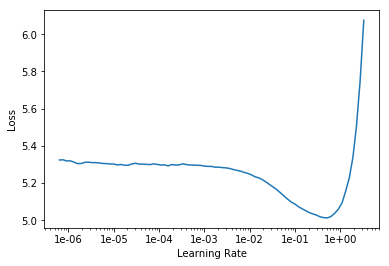

In [91]:
learn_lm.lr_find()
learn_lm.recorder.plot()

In [92]:
learn_lm.fit_one_cycle(1, 5e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.520447,4.112982,0.285067,00:04


In [15]:
learn_lm.save('learn_lm_ASTD_epoch1_acc272')

In [93]:
learn_lm.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


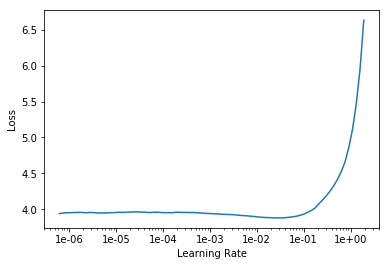

In [94]:
learn_lm.lr_find()
learn_lm.recorder.plot()

In [95]:
learn_lm.fit_one_cycle(6, slice(5e-3/(2.6**4),5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,3.901358,4.004862,0.300022,00:06
1,3.766921,3.870316,0.315848,00:06
2,3.581739,3.816319,0.324263,00:06
3,3.390822,3.809503,0.326473,00:06
4,3.221774,3.827946,0.326362,00:06
5,3.119199,3.827676,0.326339,00:06


In [96]:
learn_lm.save_encoder('fine_tuned_encoder_ASTD_acc326_min4')
# 3.935220	4.281686	0.295004

In [19]:
learn_lm.predict('الله يبارك في +ك ', n_words=30)

'الله يبارك في +ك  ما شاء الله في هجوم ثالث من اقوي ال+ رب   حمايه مصر و+ ال+ مجتمع ال+ عربي و+ حمايه حقوق + نا بقيت ال+ ارهاب يقدر فقط ل+ وحد'

## Classifier

In [97]:
ar_tok = Tokenizer(lang='ar')
data_clas = TextClasDataBunch.from_df(path, train_df=df_train, valid_df=df_val, text_cols=1, label_cols=0, tokenizer=ar_tok, bs=32, vocab=data_lm.train_ds.vocab, include_bos=False, min_freq=4)

In [98]:
data_clas.save(path/'data'/'data_clas_ASTD_min4.pkl')

In [6]:
data_clas = load_data(path, path/'data'/'data_clas_HARD.pkl', bs=32)

In [57]:
data_clas.show_batch()

text,target
الناصبي مرسي ف اخر ليل + ه ل + ه استخدم مفرد + ه ال+ شرعيه عشرات ال+ مرات لان عقد + ه ال+ شرعيه عند + ه وصلت حد + ها و+ هذا عقد + ه نقص + ه شرعي + ه قياد + ه ال+ بحارنه من زمان,-1
و+ من يردد + ها هم من لا نريد + هم في مصر لا في ال+ سياسه و+ لا في ال+ برلمان ال+ قادم و+ ك+ فاهم ال+ ضرر الذي احدثوا + ه ل+ ثقافه + نا و+ وعي + نا ال+ سياسي بلغه + هم و+ اساليب + هم,-1
ال+ مصري ال+ حقيقي ك+ ال+ هرم ال+ شامخ رفقه + ه شرف و ال+ تواصل مع + ه حق و نسيان + ه محال و ال+ دعاء ل + ه واجبكل عام و انتم ب+ خير و مصر طيب + ه و حره امن + ه,1
من قام ليل + ه ال+ قدر ايمانا و+ احتسابا غفر ل + ه ما تقدم من ذنب + ه قف بين يدي ال+ رحمن و+ اطل ال+ وقوف و+ قل يا رب اتيه + ك ب+ ذنوب كثير + ه و انت ال+ عفو ال+ كريم,1
ابراهيم عيسي قلم شجاع و+ ضمير يقظ و+ علام + ه بارز + ه في تاريخ ال+ مهنه تحي + ه ل + ه و+ ل+ فريق ال+ دستور و+ س+ تبقي حريه ال+ صحافه في مصر ثمر + ه مستحق + ه ل+ نضال ال+ صحفيين,1


In [99]:
learn_clas = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.2, metrics=[accuracy,FBeta(average='weighted')])
learn_clas.load_encoder('fine_tuned_encoder_ASTD_acc326_min4')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


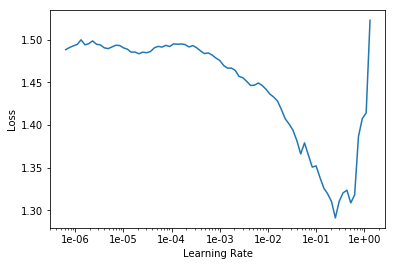

In [100]:
learn_clas.lr_find()
learn_clas.recorder.plot()

In [101]:
learn_clas.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.851637,0.866255,0.678322,0.641764,01:04


In [35]:
learn_clas.save('ASTD_first_acc685_f643')

In [38]:
learn_clas.load('ASTD_first_acc685_f643')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (8004 items)
x: TextList
  اجلاء اكثر من xxunk شخص تحسبا ل+ xxunk ال+ xxunk,  ل+ ال+ تخلص من مرسي غاندي هو ال+ حل,  رقم يا اخ + ي اي منصب رفضت ال+ مناصب ال+ لي عرضت عليا xxunk ان + ي ب+ قوم ب+ دوري و+ مش محتاج مناصب ارحمونا يرحم + كم الله xxunk ب+ نزاهه,  xxunk الله يا جماعه و+ بلاش اشاعات عن مفاجات عشان مش عايزين xxunk كل ال+ حكايه ملف معقد xxunk نفهم + ه مع بعض,  ب+ ال+ فيديو عكاشه و+ الله هيفاء و+ هبي ست مش طريه و+ ال+ لي يتجوز + ها يبقي خد خازوق بوابه ال+ قاهره مصر توفيق عكاشه
y: CategoryList
-2,-2,0,1,-1
Path: .;

Valid: LabelList (2002 items)
x: TextList
  في عالم موازي ان + ي مخلص كل حاجه ليله ال+ امتحان و ب+ راجع او احل,  عندما + ما تحتاج ل+ حواءط xxunk ل+ مءسسات ال+ دوله ف+ هذا xxunk ان تلك ال+ مءسسات ليست ل+ خدمه ال+ شعب و+ انما + ما ل+ قهر + ه,  رونالدو xxunk ل+ لقاء البايرن ريال مدريد كريستيانو رونالدو,  رقم انا ب+ رض + ه ال+ لي ب+ تكلم زي عمر سليمان ده شكل + ه xxunk من + كم و+ ب+ كل امانه انا كنت احترم + كم ايضا و+ لكن ك

In [102]:
learn_clas.freeze_to(-2)
#learn_clas.lr_find()
#learn_clas.recorder.plot()
#learn_clas.fit_one_cycle(2, slice(1e-2/(2.6**4),1e-2))

In [103]:
learn_clas.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.843509,0.848543,0.690310,0.665196,01:07


In [104]:
learn_clas.save('ASTD_second_acc690_f665_min4')

In [100]:
learn_clas.load('ArSenTD-LEV_preprocessed_second_acc484_f471')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (3200 items)
x: TextList
  ال+ ان اي مواطن يراجع اي جهه حكومي + ه و+ لم تخدم + ه حسب ال+ نظام يرفع جوال + ه و+ لا يرد + ه الا رقم مكافحه ال+ فساد خلو + نا ننظف ال+ بلد من + هم ال+ ملك يحارب ال+ فساد,  كلام ال+ ناس محمد عبيد يعتبر ان ما جري ال+ يوم هو اخطر من رقم ايار قرارات ال+ حكومه ال+ لبنانيه عام رقم حول امن ال+ مطار و+ خط,  ال+ اردنيه ال+ مهندسه هدي ال+ حسيني تحصد ذهبي + ه جاءز + ه ستيفي ك+ افضل موظف + ه في ال+ عالم و+ ذلك عن فءه ال+ مءسسات ال+ حكوميه او غي,  في متل ب+ قول ادفشني و+ شوف ما اجحشني و+ انت يا سعد جحش خريها شخ تحتك و+ لكن اسمع لبنان مقاوم + ه لا تعرف ال+ هوان و+ لا تعر,  رجعت الضرايب ب+ كل دول ال+ عالم ب+ استثناء لبنان مقابل كل ضريبه في خدم + ه عن + نا مقابل كل ضريبه في ضرب + ه بتضربنا ب+ ال+ قلب طيب ليش انا لبناني
y: CategoryList
1,-1,1,-1,-2
Path: .;

Valid: LabelList (800 items)
x: TextList
  تصل ال+ سحب ال+ ممطره ل+ ال+ منطقه ال+ وسطي سدير صباح غد ال+ ثلاثاء ب+ شكل خفيف و+ تتحسن ب+ اذن الله من بعد ال+ ظهر و+ هي م

In [106]:
learn_clas.freeze_to(-3)
#learn_clas.lr_find()
#learn_clas.recorder.plot()
#learn_clas.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3))

In [107]:
# to be deleted
learn_clas.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.753973,0.835982,0.692308,0.665192,01:09


In [108]:
learn_clas.save('ASTD_third_acc692_f665_min4')
# 0.686314	0.656684

In [59]:
learn_clas.load('ASTD_third_acc689_f668')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (8004 items)
x: TextList
  اجلاء اكثر من xxunk شخص تحسبا ل+ xxunk ال+ xxunk,  ل+ ال+ تخلص من مرسي غاندي هو ال+ حل,  رقم يا اخ + ي اي منصب رفضت ال+ مناصب ال+ لي عرضت عليا xxunk ان + ي ب+ قوم ب+ دوري و+ مش محتاج مناصب ارحمونا يرحم + كم الله xxunk ب+ نزاهه,  xxunk الله يا جماعه و+ بلاش اشاعات عن مفاجات عشان مش عايزين xxunk كل ال+ حكايه ملف معقد xxunk نفهم + ه مع بعض,  ب+ ال+ فيديو عكاشه و+ الله هيفاء و+ هبي ست مش طريه و+ ال+ لي يتجوز + ها يبقي خد خازوق بوابه ال+ قاهره مصر توفيق عكاشه
y: CategoryList
-2,-2,0,1,-1
Path: .;

Valid: LabelList (2002 items)
x: TextList
  في عالم موازي ان + ي مخلص كل حاجه ليله ال+ امتحان و ب+ راجع او احل,  عندما + ما تحتاج ل+ حواءط xxunk ل+ مءسسات ال+ دوله ف+ هذا xxunk ان تلك ال+ مءسسات ليست ل+ خدمه ال+ شعب و+ انما + ما ل+ قهر + ه,  رونالدو xxunk ل+ لقاء البايرن ريال مدريد كريستيانو رونالدو,  رقم انا ب+ رض + ه ال+ لي ب+ تكلم زي عمر سليمان ده شكل + ه xxunk من + كم و+ ب+ كل امانه انا كنت احترم + كم ايضا و+ لكن ك

In [109]:
learn_clas.unfreeze()
#learn_clas.lr_find()
#learn_clas.recorder.plot()

In [110]:
#learn_clas.unfreeze()
learn_clas.fit_one_cycle(6, slice(1e-4/(2.6**4),1e-4))
# 0.659341	0.857126	0.698801	0.677395

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.720984,0.832350,0.696304,0.666945,01:11
1,0.708480,0.839034,0.689810,0.669408,01:11
2,0.694973,0.839271,0.686813,0.667135,01:11
3,0.702815,0.832584,0.697802,0.670850,01:11
4,0.702329,0.833517,0.696304,0.671418,01:13
5,0.684041,0.837961,0.690809,0.671963,01:12


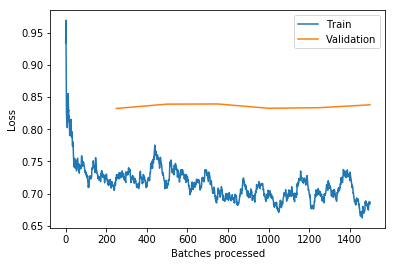

In [111]:
learn_clas.recorder.plot_losses()

In [28]:
learn_clas.save('third_acc861_f889')

### Results
|Dataset|epoch|train_loss|valid_loss|accuracy|f_beta  |seed|test split|
|-------|-----|----------|----------|--------|--------|----|----------|
|ASTD-B |6	  |0.438674  |0.448438  |0.864662|0.857988|42  |0.1       |
|ASTD   |6	  |0.659341  |0.857126  |0.698801|0.677395|42  |0.2       |
|AJGT   |5    |0.429798	 |0.452757	|0.805556|0.745665|14  |0.2       |
|LEV    |16   |1.185471  |1.251261  |0.523750|0.511322|14  |0.2       |
|HARD   |7    |0.121737  |0.128373  |0.956695|0.956682|43  |0.2       |